## Ridge Regression with All Public Utilities Dummy Added

In [1]:
#We learned about regularization to lower variance and I would like to try that with the dummy values I did not use from Submission 3
#(Because they caused too much variance)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import warnings; warnings.simplefilter('ignore')

In [2]:
train4 = pd.read_csv('./datasets/train4.csv')
test3 = pd.read_csv('./datasets/test3.csv')
train4.set_index('Id', inplace=True)
test3.set_index('Id', inplace=True)

In [3]:
def r2_adj(x, y, k):
    lr = LinearRegression()
    lr.fit(x, y)
    null_pred=y.mean()
    null_resids = y-null_pred
    null_sse = (null_resids**2).sum()
    pred = lr.predict(x)
    resids = y - pred
    sse=(resids**2).sum()
    r2 = 1-((sse) / (null_sse))
    n = len(y)
    r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
    return r2_adj

def run_metrics(x,y, k):
    lr = LinearRegression()
    lr.fit(x, y)
    pred = lr.predict(x)
    resids = y - pred
    r2 = lr.score(x,y)
    mae = metrics.mean_absolute_error(y, pred)
    sse = (resids**2).sum()
    rmse = metrics.mean_squared_error(y, pred, squared=False)
    mse = metrics.mean_squared_error(y, pred)
    r2a = r2_adj(x,y,k)
    print(f'Mean Adjusted errors: {mae}')
    print(f'Sum Squared Errors: {sse}')
    print(f'Mean Square Errors: {mse}' )
    print(f'Root Mean Square Errors: {rmse}')
    print(f'R2: {r2}')
    print(f'Adjusted R2: {r2a}')

In [4]:
#Bring the utilities dummies bacl
def dummies(df):
    utilities_dum = pd.get_dummies(df['Utilities'])
    df['all_pub'] = utilities_dum['AllPub']
    return df.head()


In [5]:
dummies(train4)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Yr Sold,Sale Type,SalePrice,Qual_Cond,yr_sold_cond,lot_liv,high_qual_fp,paved_street,all_pub,3nbs
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,2010,WD,130500,48,16080,19991643,0,1,1,0
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,2009,WD,220000,35,10045,24386024,0,1,1,0
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,2010,WD,109000,35,14070,8373554,0,1,1,0
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,2010,WD,174000,25,10050,14154088,0,1,1,0
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,2010,WD,138500,48,16080,20569575,0,1,1,0


In [6]:
dummies(test3)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Yr Sold,Sale Type,yr_sold_cond,lot_liv,Qual_Cond,high_qual_fp,paved_street,all_pub,SalePrice,3nbs
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,2006,WD,16048,17625776,48,0,1,1,153283.905043,0
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,2006,WD,8024,19005154,20,0,1,1,172533.261740,0
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,2006,New,10030,25587584,35,1,1,1,199292.074857,0
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,2007,WD,12042,8247360,30,0,1,1,108989.512880,0
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,2009,WD,10045,13243000,30,1,1,1,177171.633684,0


In [7]:
features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 
            'Qual_Cond', 'lot_liv', 'TotRms AbvGrd', 'Garage Yr Blt', 'Overall Cond', 'Kitchen AbvGr', 'Bedroom AbvGr', 
           'high_qual_fp', 'paved_street', 'all_pub', '3nbs']
X = train4[features]
y = train4['SalePrice']
run_metrics(X,y,18)

Mean Adjusted errors: 20878.099204538674
Sum Squared Errors: 2214769487130.8594
Mean Square Errors: 1080902629.1512246
Root Mean Square Errors: 32877.08364729488
R2: 0.827865751622845
Adjusted R2: 0.8263394380904366


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
linreg=LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print(f'R2 Train {linreg.score(X_train, y_train)}')
print(f'RMSE Train {metrics.mean_squared_error(y_train, linreg.predict(X_train), squared=False)}')
print(f'R2 Test {linreg.score(X_test, y_test)}')
print(f'RMSE Test {metrics.mean_squared_error(y_test, linreg.predict(X_test), squared=False)}')

R2 Train 0.8128970391452539
RMSE Train 33840.16176811767
R2 Test 0.877093855593111
RMSE Test 29152.44837646554


In [10]:
#Scale the data so it is all relative to each other
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)
test3_sc = sc.transform(test3[features])
#need to scale test3 in order to make sure prediction is also to scale (the first time I tried, my predictions were WAY off)
#Eric was an amazing help with this issue!
print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')
#Regularization lesson
#Blanket citation for all regularization and LASSO stuff is from the Regularization lesson unless otherwise specified

Z_train shape is: (1639, 18)
y_train shape is: (1639,)
Z_test shape is: (410, 18)
y_test shape is: (410,)


In [11]:
#Fit the linear regression to the scaled data and check the accuracy (the score is now accuracy)
linreg.fit(Z_train, y_train)
linreg.score(Z_train, y_train)

0.8128970391452539

In [12]:
linreg.score(Z_test, y_test)

0.8770938555929392

In [13]:
#Need this for ridge regression model
from sklearn.linear_model import Ridge

In [14]:
from sklearn.linear_model import RidgeCV
r_alphas = np.logspace(0, 5, 100)
# Cross-validate over our list of ridge alphas.
#instantiate mode and fit it to the scales data
ridge_cv = RidgeCV(
    alphas=r_alphas,
    scoring='r2',
    cv=5)
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring='r2',
        store_cv_values=False)

In [16]:
print(f'Ridge CV Train Score {ridge_cv.score(Z_train, y_train)}')
print(f'Ridge CV Test Score {ridge_cv.score(Z_test, y_test)}')
#This did bring the variance down slightly
#This is accuracy

Ridge CV Train Score 0.8002647623743483
Ridge CV Test Score 0.8588233170590354


In [17]:
#Predict the sale price with this model, save the output and save cleaning changes
test3['SalePrice'] = ridge_cv.predict(test3_sc)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Yr Sold,Sale Type,yr_sold_cond,lot_liv,Qual_Cond,high_qual_fp,paved_street,all_pub,SalePrice,3nbs
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,2006,WD,16048,17625776,48,0,1,1,155735.061728,0
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,2006,WD,8024,19005154,20,0,1,1,189836.426470,0
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,2006,New,10030,25587584,35,1,1,1,204752.215647,0
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,2007,WD,12042,8247360,30,0,1,1,117655.967085,0
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,2009,WD,10045,13243000,30,1,1,1,182091.496947,0


In [18]:
output5 = test3[['SalePrice']]
output5.head()

,SalePrice
Id,
2658,155735.061728
2718,189836.426470
2414,204752.215647
1989,117655.967085
625,182091.496947


In [19]:
output5.to_csv('./datasets/dana_submission_5.csv')

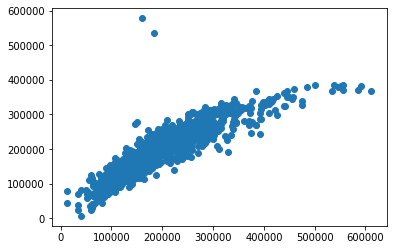

In [22]:
#Make a scatter plot of the actual Sale Price vs. the Predicted sale price 
#I am noticing some outliers - I should take them out!
plt.scatter(y_train, ridge_cv.predict(Z_train));

In [ ]:
plt.scatter(y_test, ridge_cv.predict(Z_test));

## Summary
I added one dummy column I previously didnt use due to high variance in the train/ test data

I used ridge regression to scale my data and to reduce the variance in my models